Add your name and PID
<br> Kush Parmar A14032759<br> Alex Biz A14455796 <br> Jessica Cramer A12606890 <br> Abhik Roy A14421125 <br>

## Introduction

### Overview

### Research Question

Is there a correlation between the number of profane words in a song and the song's popularity (i.e. its Spotify rating)? Will this change when controlling for release year or genre?

### Hypothesis

We hypothesize that the number of profane lyrics will positively correlate with popularity in the genres of rap/hip-hop and pop. These genres often have underlying themes that lend themselves to the presence of profanity, such as violence and rebellion for rap and such as love and recreation for pop. Furthermore, these genres are generally meant for consumption by non-children audiences and thus profanity may be more present and thus more of a correlation with popularity.

### Background

In recent years, profanity in popular culture has seemed to be increasing, leading to many analyses and research articles on why we curse and whether or not cursing is good or bad. With the advent of the Internet, the access of progressively younger generations to more profane media has been steadily increasing. But is this just a flawed perception of culture and profanity prevalence that simply comes from the interpreter becoming older? According to a research article by Twenge et al., profanity actually is becoming more prevalent in written media (in particular, books), a correlate for culture [1].

In music, another correlate for culture, the presence of profanity also seems to be increasing, especially since the turn of the millennia. This is backed by data analysis as well, with around 40% of Billboard Hot 100 #1 singles having the label of 'explicit' from 2002-2008 and over 60% of these having said label in 2017 [2]. With this background, some positive correlation between profanity and popularity in music, especially within recent years, seems clear. Can this relationship be generalized further, where the number of profane lyrics correlates with individual song popularity?


Sources:

1. Twenge, J. et al. (2017). The seven words you can never say on television: Increases in the use of swear words in American Books, 1950-2008. *SAGE Open*. DOI: 10.1177/2158244017723689

2. Bannister, M. (2017). The billboard hot 100: Exploring six decades of number one singles. *Github*. URL: https://github.com/mspbannister/dand-p4-billboard/blob/master/Billboard_analysis__100417_.md#the-billboard-hot-100-exploring-six-decades-of-number-one-singles


###  Dataset Description

link to dataset(s)
- https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics
- This dataset is the set of 380,000 songs and their respective lyrics.
- https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-tracks/
- This dataset is the set of songs that correspond to the songs and lyrics provided by kaggle.
- https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audiofeatures/
This dataset contains the data that corresponds to the popularity of each song.

Number of observations: 380,000+ 

Variables included in dataset:
Kaggle Dataset:  Song Name, Artist, Year, Genre, Lyrics
Scraped from Spotify API: Popularity, Audio Features

Source of the data: Kaggle, and scraping different attributes from spotify using the spotify API

Further explanation of dataset:
The Kaggle dataset contains 380,000 songs, and their lyrics. Running a simple python script, and using the Spotify API, we get more variables for each song. We will create subsets of the data by genres similarly. The song lyric data will be joined with the data by song name and will allow us to create a dataframe with all the necessary information.

Spotify assigns almost all songs, a popularity rating between 0-100, and several other audio features that can be analysed. The algorithm which generates the popularity is proprietary, therefore it’s not known how exactly it functions, however, it should allow us to do correlation and regression tests on the data in order to test our hypothesis. These are the two datasets that are provided by spotify. 

To classify a particular word as profane we will use a python library called profanity-check(https://github.com/vzhou842/profanity-check) to calculate the frequency of profane words. This library uses a pre trained SVM to classify strings as being profane.


## Data Cleaning and Pre-processing

### Setup

Describe setup process

In [42]:
# import libraries
import pandas as pd
import spotipy
from profanity_check import predict, predict_prob
import numpy as np
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

In [14]:
# load in raw data
raw_data = pd.read_csv("./dataset/with_norm.csv")
# raw_data.index = raw_data["index"]
# raw_data = raw_data.drop(columns=["index"])

# add popularity column
# raw_data["pop"] = np.zeros(len(raw_data))

raw_data

,Unnamed: 0,index,song,year,artist,genre,lyrics,pop,prof
0,0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\r\r\r\r\r\nYou know I'...",42.0,2
1,5,5,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,I heard\r\r\r\r\r\nChurch bells ringing\r\r\r\...,46.0,0
2,6,6,once-in-a-lifetime,2009,beyonce-knowles,Pop,This is just another day that I would spend\r\...,33.0,0
3,16,16,poison,2009,beyonce-knowles,Pop,You're bad for me I clearly get it\r\r\r\r\r\n...,39.0,2
4,18,18,beautiful-liar,2007,beyonce-knowles,Pop,Ay\r\r\r\r\r\nAy\r\r\r\r\r\nAy (Nobody likes t...,61.0,0
5,19,19,beautiful-liar-spanish,2007,beyonce-knowles,Pop,Ay! Ay!\r\r\r\r\r\n(Nobody likes being played)...,34.0,0
6,20,20,beautiful-liar-spanglish-version,2007,beyonce-knowles,Pop,Ay! Ay!\r\r\r\r\r\n(Nobody likes being played)...,33.0,0
7,24,24,bello-embustero,2007,beyonce-knowles,Pop,"Ay! Ay! Ay!\r\r\r\r\r\nOh! Beyonc, Beyonc\r\r\...",34.0,0
8,29,29,if,2007,beyonce-knowles,Pop,He is always laughin' and flirting with me\r\r...,68.0,0
9,31,31,bello-embustero-beautiful-liar-spanish-version,2007,beyonce-knowles,Pop,"Ay! Ay! Ay!\r\r\r\r\r\nOh! Beyonce, Beyonce\r\...",34.0,0


In [3]:
# get popularity data from spotify API

# Setup spotify API 
# client_manage = SpotifyClientCredentials(client_id="a47de82ee2f24629ba951b0d1beea37c" , client_secret="539e6aca7ae648b981d8dc494f276cd8")
# spot = spotipy.Spotify(client_credentials_manager=client_manage)

In [4]:
# iterate over all songs 
# for i in range(359999, len(raw_data)):
    # song = raw_data.iloc[i]["song"]
    # artist = raw_data.iloc[i]["artist"]
    
    # replace hyphen with spaces
    # song = song.replace("-", " ")
    # artist = artist.replace("-", " ")
    
    # get popularity ratings - maybe other stuff later on
    # result = spot.search("track: " + song + " artist: " + artist, limit=3)
    # result = result['tracks']['items']
    
    # go through list, and find song
    # if len(result) != 0:
        # name = result[0]["name"]
        # pop = result[0]["popularity"]
        # raw_data.at[i,"pop"] = pop

    # print
    # print("iteration " + str(i) +"/" + str(len(raw_data)), end="\r")
    
    # save progress for every song, and keep track of progress
    # if (i % 1000) == 0:
        # write to file
        # raw_data.to_csv("./dataset/with_pop.csv")
        
# write to file
# raw_data.to_csv("./dataset/with_pop.csv")

### Cleaning

Describe cleaning process

In [30]:
# Drop NaN lyrics
# raw_data.dropna(inplace=True, subset=["lyrics"])

# Drop 0 popularity
# raw_data = raw_data.drop(raw_data[raw_data["pop"] == 0].index)

# drop index columns from original data
# raw_data = raw_data.drop(columns=["index", "Unnamed: 0"])

# clean \rs from all lyrics
def clean_lyrics(lyrics):
    lyrics = lyrics.replace("\r", "")
    return lyrics
# raw_data["lyrics"] = raw_data["lyrics"].apply(clean_lyrics)
raw_data

,song,year,artist,genre,lyrics,pop,prof
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",42.0,2
1,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,I heard\nChurch bells ringing\nI heard\nA choi...,46.0,0
2,once-in-a-lifetime,2009,beyonce-knowles,Pop,This is just another day that I would spend\nW...,33.0,0
3,poison,2009,beyonce-knowles,Pop,You're bad for me I clearly get it\nI don't se...,39.0,2
4,beautiful-liar,2007,beyonce-knowles,Pop,"Ay\nAy\nAy (Nobody likes to be played)\nOh, Be...",61.0,0
5,beautiful-liar-spanish,2007,beyonce-knowles,Pop,Ay! Ay!\n(Nobody likes being played)\nAy!\nOh!...,34.0,0
6,beautiful-liar-spanglish-version,2007,beyonce-knowles,Pop,Ay! Ay!\n(Nobody likes being played)\nAy!\nOh!...,33.0,0
7,bello-embustero,2007,beyonce-knowles,Pop,"Ay! Ay! Ay!\nOh! Beyonc, Beyonc\nOh! Beyonc, B...",34.0,0
8,if,2007,beyonce-knowles,Pop,He is always laughin' and flirting with me\nAn...,68.0,0
9,bello-embustero-beautiful-liar-spanish-version,2007,beyonce-knowles,Pop,"Ay! Ay! Ay!\nOh! Beyonce, Beyonce\nOh! Beyonce...",34.0,0


In [22]:
# add profanity column

def prof(lyrics):
    lyrics = lyrics.split("\n")
    prof = 0
    prof_arr = np.array(predict(lyrics))
    prof = prof_arr.sum()
    print(prof, end="\r")
    return prof

# raw_data["prof"] = raw_data["lyrics"].apply(prof)

In [31]:
# raw_data.to_csv("./dataset/with_prof_no_norm.csv")

In [36]:
# add normalised column
# for i in range(len(raw_data)):
    # prof = raw_data.iloc[i]["prof"]
    # lines = len(raw_data.iloc[i]["lyrics"].split("\n"))
    # raw_data.at[i, "norm"] = prof / lines
    # print(i, end="\r")


In [37]:
raw_data

,song,year,artist,genre,lyrics,pop,prof,norm
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",42.0,2,0.040000
1,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,I heard\nChurch bells ringing\nI heard\nA choi...,46.0,0,0.000000
2,once-in-a-lifetime,2009,beyonce-knowles,Pop,This is just another day that I would spend\nW...,33.0,0,0.000000
3,poison,2009,beyonce-knowles,Pop,You're bad for me I clearly get it\nI don't se...,39.0,2,0.023810
4,beautiful-liar,2007,beyonce-knowles,Pop,"Ay\nAy\nAy (Nobody likes to be played)\nOh, Be...",61.0,0,0.000000
5,beautiful-liar-spanish,2007,beyonce-knowles,Pop,Ay! Ay!\n(Nobody likes being played)\nAy!\nOh!...,34.0,0,0.000000
6,beautiful-liar-spanglish-version,2007,beyonce-knowles,Pop,Ay! Ay!\n(Nobody likes being played)\nAy!\nOh!...,33.0,0,0.000000
7,bello-embustero,2007,beyonce-knowles,Pop,"Ay! Ay! Ay!\nOh! Beyonc, Beyonc\nOh! Beyonc, B...",34.0,0,0.000000
8,if,2007,beyonce-knowles,Pop,He is always laughin' and flirting with me\nAn...,68.0,0,0.000000
9,bello-embustero-beautiful-liar-spanish-version,2007,beyonce-knowles,Pop,"Ay! Ay! Ay!\nOh! Beyonce, Beyonce\nOh! Beyonce...",34.0,0,0.000000


In [38]:
# raw_data.to_csv("./dataset/with_norm.csv")

## Data Analysis

['Pop' 'Hip-Hop' 'Rock' 'Metal' 'Not Available' 'Country' 'Jazz'
 'Electronic' 'Folk' 'R&B' 'Indie' 'Other']
number of genres: 11


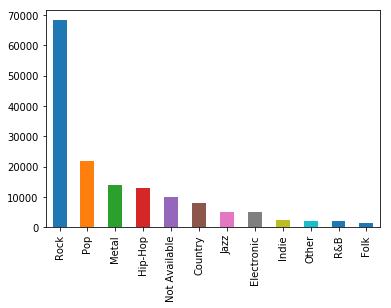

In [62]:
# summary, and description of data
genres = raw_data["genre"].unique()
print(genres)
print("number of genres: " + str(len(genres)- 1))

raw_data["genre"].value_counts().plot.bar()
f1 = plt.gcf()

[1968, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Range : 48 years


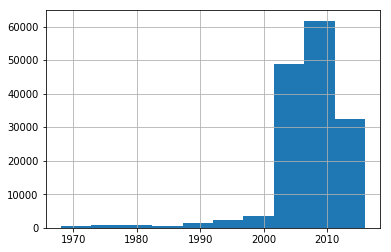

In [65]:
years = raw_data["year"].unique()

print(sorted(years))
print("Range : 48 years")

raw_data["year"].hist()
f2 = plt.gcf()

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0]
Range : 85


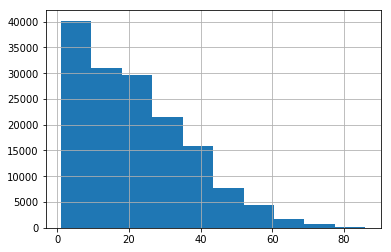

In [66]:
pop = raw_data["pop"].unique()

print(sorted(pop))
print("Range : 85")

raw_data["pop"].hist()
f3 = plt.gcf()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 67, 68, 76, 80, 83, 87, 92, 93, 99, 140]
Range : 140


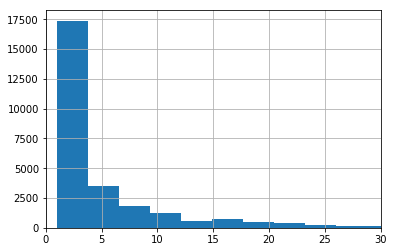

In [79]:
prof = raw_data["prof"].unique()
print(sorted(prof))
print("Range : 140")

with_prof = raw_data[raw_data["prof"] != 0]

with_prof["prof"].hist(bins=50)
plt.xlim(left= 0, right = 30)
f4 = plt.gcf()

In [70]:
norm = raw_data["norm"].unique()
print("no of unique vals " + str(len(norm)))

no of unique vals 1970


In [40]:
# 1. prof, and pop  2. pop, and genre, and year 3. year and prof

## Privacy/Ethics Considerations

In terms of ethics and privacy, we did have permission to use this data. All the information, while technically personal, given that it references specific artists, their songs, and the lyrics of those songs, is publically available and is not sensitive information. We concluded that as this information is publically available it does not violate any privacy concerns. However, as we are using a profanity rating to attach some sort of value to our dataset, we acknowledge that as this is not an exact science, in terms of classification, we cannot use any specific datapoint as an example of profanity as we would not want to falsely slander by classifying a clean song as possessing strong elements of profanity. We handle this by not including any one specific point in a publishing of our results.

This also is likely to exclude certain time periods of music as it is only a collection of about 150 thousand songs and this is not inclusive of all songs, as there are obviously more than a hundred and fifty thousand songs. However, we believe that this data is sufficient enough, especially within the time period that we select for to give us enough data points to make reasonable conclusions off of. Therefore, although the profanity classification may be an issue, there should be no other ethical concerns with our data, given that it is non-controversial and publicly available.


## Conclusion

## Discussion